In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import sklearn


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import mean_squared_logarithmic_error, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [4]:
df=pd.read_csv("project_files/cleaned_listings.csv")

In [5]:
df.head(1)

,id,price,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,listdate
0,7,200000.0,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,2020-07-18 00:00:00


In [6]:
df['listdate']= pd.to_datetime(df['listdate'])

In [7]:
df["list_year"]=df['listdate'].dt.year

In [8]:
df["list_month"]=df['listdate'].dt.month

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          6918 non-null   int64         
 1   price       6918 non-null   float64       
 2   bedrooms    6918 non-null   int64         
 3   bathrooms   6918 non-null   int64         
 4   toilets     6918 non-null   float64       
 5   furnished   6918 non-null   int64         
 6   serviced    6918 non-null   int64         
 7   shared      6918 non-null   int64         
 8   parking     6918 non-null   int64         
 9   category    6918 non-null   object        
 10  type        6918 non-null   object        
 11  sub_type    6918 non-null   object        
 12  state       6918 non-null   object        
 13  locality    6918 non-null   object        
 14  listdate    6918 non-null   datetime64[ns]
 15  list_year   6918 non-null   int64         
 16  list_month  6918 non-nul

In [10]:
df.drop('listdate', inplace=True, axis=1)

In [11]:
df.drop('id', inplace=True, axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       6918 non-null   float64
 1   bedrooms    6918 non-null   int64  
 2   bathrooms   6918 non-null   int64  
 3   toilets     6918 non-null   float64
 4   furnished   6918 non-null   int64  
 5   serviced    6918 non-null   int64  
 6   shared      6918 non-null   int64  
 7   parking     6918 non-null   int64  
 8   category    6918 non-null   object 
 9   type        6918 non-null   object 
 10  sub_type    6918 non-null   object 
 11  state       6918 non-null   object 
 12  locality    6918 non-null   object 
 13  list_year   6918 non-null   int64  
 14  list_month  6918 non-null   int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 810.8+ KB


In [13]:
df.category.unique()

array(['For Rent', 'For Sale'], dtype=object)

In [14]:
df.type.unique()

array(['House', 'Apartment'], dtype=object)

In [15]:
df.sub_type.unique()

array(['Townhouse', 'Missing', 'Detached Duplex', 'Detached Bungalow',
       'Mini Flat', 'Semi-detached Duplex', 'Terraced Bungalow',
       'Bedsitter (Single Room)', 'Block of Flats',
       'Semi-detached Bungalow', 'Terraced Duplex'], dtype=object)

In [16]:
df.state.unique()

array(['Nairobi', 'Kiambu', 'Kajiado', 'Mombasa'], dtype=object)

In [17]:
df.locality.unique()

array(['Nairobi Central', 'Parklands', 'Lavington', 'Westlands',
       'Kileleshwa', 'Kitisuru', 'Kabete', 'Kilimani', 'Karen',
       'Kitengela', 'Mugumo-Ini (Langata)', 'Thika', 'Ruiru', 'Kasarani',
       'Kikuyu', 'Juja', 'Nairobi West', 'Ngong', 'Nyali',
       'Ongata Rongai', 'Bamburi', 'Embakasi'], dtype=object)

In [18]:
lb_encoder = LabelEncoder()
df['category'] = lb_encoder.fit_transform(df['category'])
df['type'] = lb_encoder.fit_transform(df['type'])
df['sub_type'] = lb_encoder.fit_transform(df['sub_type'])
df['state'] = lb_encoder.fit_transform(df['state'])
df['locality'] = lb_encoder.fit_transform(df['locality'])

In [19]:
# Split the labels and features in original dataset
features = df.drop("price", axis=1)
labels = df["price"].copy()

In [20]:
for column in features:
    if features[column].dtypes == 'int64':
        features[column] = StandardScaler().fit_transform(features[column].values.reshape(-1, 1))
display(features)

,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,list_year,list_month
0,1.213115,1.180738,5.0,-0.259351,-0.265331,-0.087865,-0.889185,0,1,10,3,13,-1.143483,0.162231
1,-0.053652,0.001874,3.0,-0.259351,-0.265331,-0.087865,-0.889185,0,0,5,3,18,-1.143483,0.162231
2,-0.053652,0.001874,3.0,-0.259351,-0.265331,-0.087865,-0.889185,0,0,5,3,11,-1.143483,0.162231
3,-0.687035,-0.587557,2.0,3.855771,-0.265331,-0.087865,-0.889185,0,0,5,3,21,-1.143483,0.162231
4,0.579732,0.591306,4.0,-0.259351,-0.265331,-0.087865,-0.889185,0,1,10,3,11,-1.143483,0.162231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,-0.053652,0.591306,0.0,-0.259351,-0.265331,-0.087865,-0.889185,1,0,5,3,7,1.318582,-0.161669
6914,-1.320419,-1.176989,1.0,-0.259351,-0.265331,-0.087865,-0.889185,1,0,5,3,21,1.318582,-0.161669
6915,-0.687035,-0.587557,2.0,-0.259351,-0.265331,-0.087865,-0.889185,1,0,5,3,21,1.318582,-0.161669
6916,0.579732,0.591306,4.0,-0.259351,-0.265331,-0.087865,1.771159,1,1,2,0,17,1.318582,-0.161669


In [21]:
for column in features:
    if features[column].dtypes == 'float64':
        features[column] = StandardScaler().fit_transform(features[column].values.reshape(-1, 1))
display(features)

,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,list_year,list_month
0,1.213115,1.180738,1.588654,-0.259351,-0.265331,-0.087865,-0.889185,0,1,10,3,13,-1.143483,0.162231
1,-0.053652,0.001874,0.581616,-0.259351,-0.265331,-0.087865,-0.889185,0,0,5,3,18,-1.143483,0.162231
2,-0.053652,0.001874,0.581616,-0.259351,-0.265331,-0.087865,-0.889185,0,0,5,3,11,-1.143483,0.162231
3,-0.687035,-0.587557,0.078097,3.855771,-0.265331,-0.087865,-0.889185,0,0,5,3,21,-1.143483,0.162231
4,0.579732,0.591306,1.085135,-0.259351,-0.265331,-0.087865,-0.889185,0,1,10,3,11,-1.143483,0.162231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6913,-0.053652,0.591306,-0.928941,-0.259351,-0.265331,-0.087865,-0.889185,1,0,5,3,7,1.318582,-0.161669
6914,-1.320419,-1.176989,-0.425422,-0.259351,-0.265331,-0.087865,-0.889185,1,0,5,3,21,1.318582,-0.161669
6915,-0.687035,-0.587557,0.078097,-0.259351,-0.265331,-0.087865,-0.889185,1,0,5,3,21,1.318582,-0.161669
6916,0.579732,0.591306,1.085135,-0.259351,-0.265331,-0.087865,1.771159,1,1,2,0,17,1.318582,-0.161669


In [22]:
features.head(1)

,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,list_year,list_month
0,1.213115,1.180738,1.588654,-0.259351,-0.265331,-0.087865,-0.889185,0,1,10,3,13,-1.143483,0.162231


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       6918 non-null   float64
 1   bedrooms    6918 non-null   int64  
 2   bathrooms   6918 non-null   int64  
 3   toilets     6918 non-null   float64
 4   furnished   6918 non-null   int64  
 5   serviced    6918 non-null   int64  
 6   shared      6918 non-null   int64  
 7   parking     6918 non-null   int64  
 8   category    6918 non-null   int32  
 9   type        6918 non-null   int32  
 10  sub_type    6918 non-null   int32  
 11  state       6918 non-null   int32  
 12  locality    6918 non-null   int32  
 13  list_year   6918 non-null   int64  
 14  list_month  6918 non-null   int64  
dtypes: float64(2), int32(5), int64(8)
memory usage: 675.7 KB


In [24]:
# Call train_test_split function from sklearn library to split the dataset randomly
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=1/3, random_state=126)

In [25]:
print( len(X_train), len(X_test), len(Y_train), len(Y_test) )

4612 2306 4612 2306


In [26]:
df.shape

(6918, 15)

In [27]:
class ANNRegressor(BaseEstimator, RegressorMixin):
    # Constructor to instantiate default or user-defined values
    def __init__(self, in_features=13, num_hidden=1, num_neurons=36, epochs=50, 
                    batch_norm=False, early_stopping=True, verbose=1):
        self.in_features = in_features
        self.num_hidden = num_hidden
        self.num_neurons = num_neurons
        self.batch_norm = batch_norm
        self.epochs = epochs
        self.early_stopping = early_stopping
        self.verbose = verbose
        
        # Build the ANN
        self.model = ANNRegressor.build_model(self.in_features, self.num_hidden, self.num_neurons, self.batch_norm)
        
    @staticmethod
    def build_model(in_features, num_hidden, num_neurons, batch_norm):
        model = Sequential()
        
        # Input layer
        model.add(Dense(num_neurons, input_shape=(in_features,), activation='relu'))

        # Add hidden layers to model
        if (num_hidden > 1):
            for i in range(num_hidden - 1):
                model.add(Dense(num_neurons, activation='relu'))
                if(batch_norm):
                    model.add(BatchNormalization())

        # Output layer
        model.add(Dense(1))
        
        return model
        
    def fit(self, X, Y):
        # Split into training and validating sets
        X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=1/3)
        
        # Specifies callbacks list
        callbacks = [
            ModelCheckpoint('models/annmodel.weights.hdf5', save_best_only=True, verbose=self.verbose)
            
        ]
        
        # Use early stopping to stop training when validation error reaches minimum
        if(self.early_stopping):
            callbacks.append(EarlyStopping(monitor='val_loss', patience=10, verbose=self.verbose))
        
        # Compile the model then train
        adam = Adam(learning_rate=0.001)
        self.model.compile(optimizer=adam, loss='mse')
        self.model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=self.epochs, 
                       callbacks=callbacks, verbose=self.verbose)
        
        model_json = self.model.to_json()
        with open("models/annmodel.json", "w") as json_file:
            json_file.write(model_json)
        self.model.save('models/ann_housing.h5')
        
    def predict(self, X):
        predictions = self.model.predict(X)
        
        return predictions

In [28]:
X_train = np.asarray(X_train).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

In [29]:
annRegressor = ANNRegressor(in_features=X_train.shape[1], num_hidden=25, num_neurons=45, epochs=29, verbose=1)
annRegressor.fit(X_train, Y_train)

Epoch 1/29
95/97 [============================>.] - ETA: 0s - loss: 464672008437760.0000
Epoch 1: val_loss improved from inf to 347484664627200.00000, saving model to models\annmodel.weights.hdf5
97/97 [==============================] - 9s 18ms/step - loss: 462743501012992.0000 - val_loss: 347484664627200.0000
Epoch 2/29
97/97 [==============================] - ETA: 0s - loss: 332362588094464.0000
Epoch 2: val_loss improved from 347484664627200.00000 to 271567929999360.00000, saving model to models\annmodel.weights.hdf5
97/97 [==============================] - 1s 10ms/step - loss: 332362588094464.0000 - val_loss: 271567929999360.0000
Epoch 3/29
92/97 [===========================>..] - ETA: 0s - loss: 268523184062464.0000
Epoch 3: val_loss did not improve from 271567929999360.00000
97/97 [==============================] - 1s 8ms/step - loss: 277067836948480.0000 - val_loss: 290172587474944.0000
Epoch 4/29
97/97 [==============================] - ETA: 0s - loss: 241361710219264.0000
Epoc

73/73 [==============================] - 0s 2ms/step


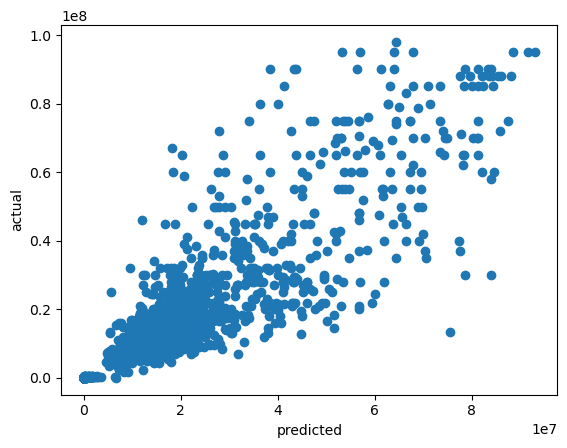

In [30]:
NN_pred = annRegressor.predict(X_test)
plt.scatter(NN_pred, Y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [31]:
# Method to display model evaluation metrics
def display_model_metrics(label, predictions):
    # The mean absolute error
    print("Mean absolute error: %.4f\n" % mean_absolute_error(label, predictions))

    # The mean squared error
    print("Root mean squared error: %.4f\n" % np.sqrt(mean_squared_error(label, predictions)))

    # The coefficient of determination: 1 is perfect prediction R^2
    print("Coefficient of determination: %.4f\n" % r2_score(label, predictions))

predictions = annRegressor.predict(X_test)
display(Y_test)
display(predictions)

display_model_metrics(Y_test, predictions[:,-1])

73/73 [==============================] - 0s 5ms/step


1421       45000.0
4190    14500000.0
972       120000.0
1790      240000.0
530       250000.0
           ...    
2429       35500.0
6808    15500000.0
5068     8500000.0
3800    18500000.0
5238    18500000.0
Name: price, Length: 2306, dtype: float64

array([[   48971.125],
       [37873640.   ],
       [  104353.55 ],
       ...,
       [11811920.   ],
       [32545450.   ],
       [17671660.   ]], dtype=float32)

Mean absolute error: 3936402.0000

Root mean squared error: 8299819.0000

Coefficient of determination: 0.8094



In [32]:
import pickle

In [33]:
pickle.dump(annRegressor, open('models/annmodel.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_10
......vars
.........0
.........1
...layers\dense_11
......vars
.........0
.........1
...layers\dense_12
......vars
.........0
.........1
...layers\dense_13
......vars
.........0
.........1
...layers\dense_14
......vars
.........0
.........1
...layers\dense_15
......vars
.........0
.........1
...layers\dense_16
......vars
.........0
.........1
...layers\dense_17
......vars
.........0
.........1
...layers\dense_18
......vars
.........0
.........1
...layers\dense_19
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_20
......vars
.........0
.........1
...layers\dense_21
......vars
.........0
.........1
...layers\dense_22
......vars
.........0
.........1
...layers\dense_23
......vars
.........0
.........1
...layers\dense_24
......vars
.........0
.........1
...